<a href="https://colab.research.google.com/github/RaoMasood1/Lungs_cancer_prediction/blob/main/Lungs_cancer_Prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [84]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [85]:
# Load your dataset (replace 'dataset.csv' with your dataset file)
data = pd.read_csv('/content/survey lung cancer.csv')

In [86]:
# Convert categorical variables to numerical using one-hot encoding
data = pd.get_dummies(data, columns=['GENDER'], drop_first=True)

In [87]:
# Extract features and target variable
X = data.drop(columns=['LUNG_CANCER'])
y = data['LUNG_CANCER']

In [88]:
print(x)

    GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0        M   69        1               2        2              1   
1        M   74        2               1        1              1   
2        F   59        1               1        1              2   
3        M   63        2               2        2              1   
4        F   63        1               2        1              1   
..     ...  ...      ...             ...      ...            ...   
304      F   56        1               1        1              2   
305      M   70        2               1        1              1   
306      M   58        2               1        1              1   
307      M   67        2               1        2              1   
308      M   62        1               1        1              2   

     CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  \
0                  1         2         1         2                  2   
1                  2         2       

In [89]:
print(y)

0      YES
1      YES
2       NO
3       NO
4       NO
      ... 
304    YES
305    YES
306    YES
307    YES
308    YES
Name: LUNG_CANCER, Length: 309, dtype: object


In [90]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [91]:
print(x_train)

     AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  CHRONIC DISEASE  \
126   51        2               1        1              1                1   
109   53        1               1        1              1                2   
247   67        1               2        1              1                1   
234   77        1               2        1              2                1   
202   74        2               1        1              1                2   
..   ...      ...             ...      ...            ...              ...   
188   65        2               2        2              2                2   
71    66        2               2        2              2                1   
106   61        2               2        2              2                2   
270   70        2               1        1              1                1   
102   64        2               1        1              1                1   

     FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  COUGHING 

In [92]:
print(y_train)

126    YES
109    YES
247    YES
234    YES
202    YES
      ... 
188    YES
71     YES
106    YES
270     NO
102    YES
Name: LUNG_CANCER, Length: 247, dtype: object


In [93]:
print(x_test)

     AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  CHRONIC DISEASE  \
288   61        1               2        2              2                1   
9     53        2               2        2              2                2   
57    73        1               1        1              1                2   
60    70        1               2        1              2                2   
25    65        1               2        2              1                1   
..   ...      ...             ...      ...            ...              ...   
198   73        2               2        2              1                2   
195   69        1               2        2              1                1   
210   54        2               1        1              1                1   
224   62        2               1        1              2                1   
158   56        1               1        2              2                2   

     FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  COUGHING 

In [94]:
print(y_test)

288    YES
9      YES
57     YES
60     YES
25     YES
      ... 
198    YES
195    YES
210    YES
224    YES
158    YES
Name: LUNG_CANCER, Length: 62, dtype: object


In [95]:
#KNN
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, matthews_corrcoef
from sklearn.neighbors import KNeighborsClassifier

# Create and train the KNN model
model_knn = KNeighborsClassifier()
model_knn.fit(x_train, y_train)

# Make predictions on the test set
y_pred_knn = model_knn.predict(x_test)

# Calculate confusion matrix
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
tn_knn, fp_knn, fn_knn, tp_knn = conf_matrix_knn.ravel()

# Calculate accuracy
accuracy_knn = accuracy_score(y_test, y_pred_knn)

# Calculate specificity (true negative rate)
specificity_knn = tn_knn / (tn_knn + fp_knn)

# Calculate sensitivity (true positive rate or recall)
sensitivity_knn = tp_knn / (tp_knn + fn_knn)

# Calculate precision
precision_knn = tp_knn / (tp_knn + fp_knn)

# Calculate F1 score
f1_score_knn = 2 * (precision_knn * sensitivity_knn) / (precision_knn + sensitivity_knn)

# Calculate Matthews Correlation Coefficient (MCC)
mcc_knn = matthews_corrcoef(y_test, y_pred_knn)

# Print metrics for KNN
print("K-Nearest Neighbors:")
print(f"Accuracy: {accuracy_knn:.4f}")
print(f"Specificity: {specificity_knn:.4f}")
print(f"Sensitivity (Recall): {sensitivity_knn:.4f}")
print(f"Precision: {precision_knn:.4f}")
print(f"F1 Score: {f1_score_knn:.4f}")
print(f"Matthews Correlation Coefficient (MCC): {mcc_knn:.4f}")

# Print classification report for additional metrics
classification_rep_knn = classification_report(y_test, y_pred_knn)
print("Classification Report:\n", classification_rep_knn)


K-Nearest Neighbors:
Accuracy: 0.9516
Specificity: 0.5000
Sensitivity (Recall): 0.9667
Precision: 0.9831
F1 Score: 0.9748
Matthews Correlation Coefficient (MCC): 0.3842
Classification Report:
               precision    recall  f1-score   support

          NO       0.33      0.50      0.40         2
         YES       0.98      0.97      0.97        60

    accuracy                           0.95        62
   macro avg       0.66      0.73      0.69        62
weighted avg       0.96      0.95      0.96        62



In [96]:
#SVM
from sklearn.svm import SVC

# Create and train the SVM model
model_svm = SVC()
model_svm.fit(x_train, y_train)

# Make predictions on the test set
y_pred_svm = model_svm.predict(x_test)

# Calculate confusion matrix
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
tn_svm, fp_svm, fn_svm, tp_svm = conf_matrix_svm.ravel()

# Calculate accuracy
accuracy_svm = accuracy_score(y_test, y_pred_svm)

# Calculate specificity (true negative rate)
specificity_svm = tn_svm / (tn_svm + fp_svm)

# Calculate sensitivity (true positive rate or recall)
sensitivity_svm = tp_svm / (tp_svm + fn_svm)

# Calculate precision
precision_svm = tp_svm / (tp_svm + fp_svm)

# Calculate F1 score
f1_score_svm = 2 * (precision_svm * sensitivity_svm) / (precision_svm + sensitivity_svm)

# Calculate Matthews Correlation Coefficient (MCC)
mcc_svm = matthews_corrcoef(y_test, y_pred_svm)

# Print metrics for SVM
print("Support Vector Machine (SVM):")
print(f"Accuracy: {accuracy_svm:.4f}")
print(f"Specificity: {specificity_svm:.4f}")
print(f"Sensitivity (Recall): {sensitivity_svm:.4f}")
print(f"Precision: {precision_svm:.4f}")
print(f"F1 Score: {f1_score_svm:.4f}")
print(f"Matthews Correlation Coefficient (MCC): {mcc_svm:.4f}")


Support Vector Machine (SVM):
Accuracy: 0.9677
Specificity: 0.0000
Sensitivity (Recall): 1.0000
Precision: 0.9677
F1 Score: 0.9836
Matthews Correlation Coefficient (MCC): 0.0000


In [97]:
#Decision Tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, matthews_corrcoef
from sklearn.tree import DecisionTreeClassifier

# Create and train the Decision Tree model
model_tree = DecisionTreeClassifier()
model_tree.fit(x_train, y_train)

# Make predictions on the test set
y_pred_tree = model_tree.predict(x_test)

# Calculate confusion matrix
conf_matrix_tree = confusion_matrix(y_test, y_pred_tree)
tn_tree, fp_tree, fn_tree, tp_tree = conf_matrix_tree.ravel()

# Calculate accuracy
accuracy_tree = accuracy_score(y_test, y_pred_tree)

# Calculate specificity (true negative rate)
specificity_tree = tn_tree / (tn_tree + fp_tree)

# Calculate sensitivity (true positive rate or recall)
sensitivity_tree = tp_tree / (tp_tree + fn_tree)

# Calculate precision
precision_tree = tp_tree / (tp_tree + fp_tree)

# Calculate F1 score
f1_score_tree = 2 * (precision_tree * sensitivity_tree) / (precision_tree + sensitivity_tree)

# Calculate Matthews Correlation Coefficient (MCC)
mcc_tree = matthews_corrcoef(y_test, y_pred_tree)

# Print metrics for Decision Tree
print("Decision Tree:")
print(f"Accuracy: {accuracy_tree:.4f}")
print(f"Specificity: {specificity_tree:.4f}")
print(f"Sensitivity (Recall): {sensitivity_tree:.4f}")
print(f"Precision: {precision_tree:.4f}")
print(f"F1 Score: {f1_score_tree:.4f}")
print(f"Matthews Correlation Coefficient (MCC): {mcc_tree:.4f}")

# Print classification report for additional metrics
classification_rep_tree = classification_report(y_test, y_pred_tree)
print("Classification Report:\n", classification_rep_tree)


Decision Tree:
Accuracy: 0.9516
Specificity: 0.5000
Sensitivity (Recall): 0.9667
Precision: 0.9831
F1 Score: 0.9748
Matthews Correlation Coefficient (MCC): 0.3842
Classification Report:
               precision    recall  f1-score   support

          NO       0.33      0.50      0.40         2
         YES       0.98      0.97      0.97        60

    accuracy                           0.95        62
   macro avg       0.66      0.73      0.69        62
weighted avg       0.96      0.95      0.96        62



In [98]:
#Random Forest
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, matthews_corrcoef
from sklearn.ensemble import RandomForestClassifier

# Create and train the Random Forest model
model_rf = RandomForestClassifier()
model_rf.fit(x_train, y_train)

# Make predictions on the test set
y_pred_rf = model_rf.predict(x_test)

# Calculate confusion matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
tn_rf, fp_rf, fn_rf, tp_rf = conf_matrix_rf.ravel()

# Calculate accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)

# Calculate specificity (true negative rate)
specificity_rf = tn_rf / (tn_rf + fp_rf)

# Calculate sensitivity (true positive rate or recall)
sensitivity_rf = tp_rf / (tp_rf + fn_rf)

# Calculate precision
precision_rf = tp_rf / (tp_rf + fp_rf)

# Calculate F1 score
f1_score_rf = 2 * (precision_rf * sensitivity_rf) / (precision_rf + sensitivity_rf)

# Calculate Matthews Correlation Coefficient (MCC)
mcc_rf = matthews_corrcoef(y_test, y_pred_rf)

# Print metrics for Random Forest
print("Random Forest:")
print(f"Accuracy: {accuracy_rf:.4f}")
print(f"Specificity: {specificity_rf:.4f}")
print(f"Sensitivity (Recall): {sensitivity_rf:.4f}")
print(f"Precision: {precision_rf:.4f}")
print(f"F1 Score: {f1_score_rf:.4f}")
print(f"Matthews Correlation Coefficient (MCC): {mcc_rf:.4f}")

# Print classification report for additional metrics
classification_rep_rf = classification_report(y_test, y_pred_rf)
print("Classification Report:\n", classification_rep_rf)


Random Forest:
Accuracy: 0.9677
Specificity: 0.5000
Sensitivity (Recall): 0.9833
Precision: 0.9833
F1 Score: 0.9833
Matthews Correlation Coefficient (MCC): 0.4833
Classification Report:
               precision    recall  f1-score   support

          NO       0.50      0.50      0.50         2
         YES       0.98      0.98      0.98        60

    accuracy                           0.97        62
   macro avg       0.74      0.74      0.74        62
weighted avg       0.97      0.97      0.97        62



In [99]:
#Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier

# Create and train the Gradient Boosting model
model_gb = GradientBoostingClassifier()
model_gb.fit(x_train, y_train)

# Make predictions on the test set
y_pred_gb = model_gb.predict(x_test)

# Calculate confusion matrix
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)
tn_gb, fp_gb, fn_gb, tp_gb = conf_matrix_gb.ravel()

# Calculate accuracy
accuracy_gb = accuracy_score(y_test, y_pred_gb)

# Calculate specificity (true negative rate)
specificity_gb = tn_gb / (tn_gb + fp_gb)

# Calculate sensitivity (true positive rate or recall)
sensitivity_gb = tp_gb / (tp_gb + fn_gb)

# Calculate precision
precision_gb = tp_gb / (tp_gb + fp_gb)

# Calculate F1 score
f1_score_gb = 2 * (precision_gb * sensitivity_gb) / (precision_gb + sensitivity_gb)

# Calculate Matthews Correlation Coefficient (MCC)
mcc_gb = matthews_corrcoef(y_test, y_pred_gb)

# Print metrics for Gradient Boosting
print("Gradient Boosting:")
print(f"Accuracy: {accuracy_gb:.4f}")
print(f"Specificity: {specificity_gb:.4f}")
print(f"Sensitivity (Recall): {sensitivity_gb:.4f}")
print(f"Precision: {precision_gb:.4f}")
print(f"F1 Score: {f1_score_gb:.4f}")
print(f"Matthews Correlation Coefficient (MCC): {mcc_gb:.4f}")


Gradient Boosting:
Accuracy: 0.9516
Specificity: 0.5000
Sensitivity (Recall): 0.9667
Precision: 0.9831
F1 Score: 0.9748
Matthews Correlation Coefficient (MCC): 0.3842


In [100]:
#Light GBM
from lightgbm import LGBMClassifier

# Create and train the Light GBM model
model_lgbm = LGBMClassifier()
model_lgbm.fit(x_train, y_train)

# Make predictions on the test set
y_pred_lgbm = model_lgbm.predict(x_test)

# Calculate confusion matrix
conf_matrix_lgbm = confusion_matrix(y_test, y_pred_lgbm)
tn_lgbm, fp_lgbm, fn_lgbm, tp_lgbm = conf_matrix_lgbm.ravel()

# Calculate accuracy
accuracy_lgbm = accuracy_score(y_test, y_pred_lgbm)

# Calculate specificity (true negative rate)
specificity_lgbm = tn_lgbm / (tn_lgbm + fp_lgbm)

# Calculate sensitivity (true positive rate or recall)
sensitivity_lgbm = tp_lgbm / (tp_lgbm + fn_lgbm)

# Calculate precision
precision_lgbm = tp_lgbm / (tp_lgbm + fp_lgbm)

# Calculate F1 score
f1_score_lgbm = 2 * (precision_lgbm * sensitivity_lgbm) / (precision_lgbm + sensitivity_lgbm)

# Calculate Matthews Correlation Coefficient (MCC)
mcc_lgbm = matthews_corrcoef(y_test, y_pred_lgbm)

# Print metrics for Light GBM
print("Light GBM:")
print(f"Accuracy: {accuracy_lgbm:.4f}")
print(f"Specificity: {specificity_lgbm:.4f}")
print(f"Sensitivity (Recall): {sensitivity_lgbm:.4f}")
print(f"Precision: {precision_lgbm:.4f}")
print(f"F1 Score: {f1_score_lgbm:.4f}")
print(f"Matthews Correlation Coefficient (MCC): {mcc_lgbm:.4f}")



Light GBM:
Accuracy: 0.9839
Specificity: 0.5000
Sensitivity (Recall): 1.0000
Precision: 0.9836
F1 Score: 0.9917
Matthews Correlation Coefficient (MCC): 0.7013


In [103]:
pip install matplotlib

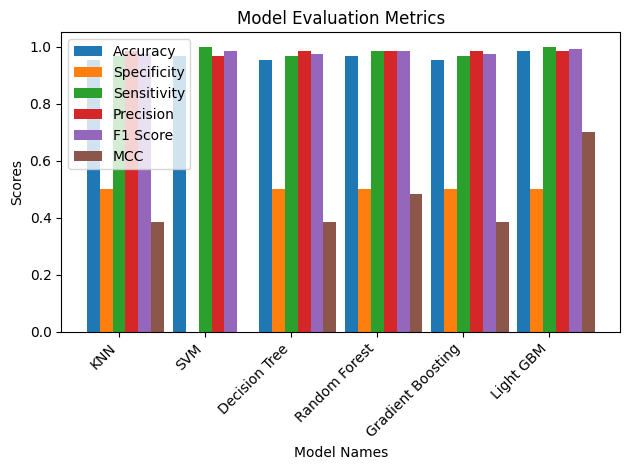

In [108]:
import matplotlib.pyplot as plt
import numpy as np

models = ['KNN', 'SVM', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'Light GBM']
accuracy = [0.9516, 0.9677, 0.9516, 0.9677, 0.9516, 0.9839]
specificity = [0.5000, 0.00, 0.5000, 0.5000, 0.5000, 0.5000]
sensitivity = [0.9667, 1.00, 0.9667, 0.9833, 0.9667, 1.000]
precision = [0.9831, 0.9677, 0.9831, 0.9833, 0.9831, 0.9836]
f1_score = [0.9748, 0.9836, 0.9748, 0.9833, 0.9748, 0.9917]
mcc = [0.3842, 0.0000, 0.3842, 0.4833, 0.3842, 0.7013]

# Create a figure and a set of subplots
fig, ax = plt.subplots()

# Set the positions for each model
x = np.arange(len(models))

# Plot each metric as a separate bar chart
ax.bar(x - 0.3, accuracy, 0.15, label='Accuracy')
ax.bar(x - 0.15, specificity, 0.15, label='Specificity')
ax.bar(x, sensitivity, 0.15, label='Sensitivity')
ax.bar(x + 0.15, precision, 0.15, label='Precision')
ax.bar(x + 0.3, f1_score, 0.15, label='F1 Score')
ax.bar(x + 0.45, mcc, 0.15, label='MCC')

# Set labels, title, and legend
ax.set_xlabel('Model Names')
ax.set_ylabel('Scores')
ax.set_title('Model Evaluation Metrics')
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=45, ha="right")
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()
